# Project: Investigate a FBI Gun Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [ ]:
#set up important library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<a id='intro'></a>
## Introduction

there is two date set Gun and census 
gun conatin type of gun and totals regestartion per state
census conatin population criteria per state 

so I found state will be the connect relation for both

## Questions to investigate

> 1. gun ratio in 2010 vs 2016 per state ?
> 2. What census data is most associated with high gun per capita?
> 3. is there any realtion between gun total and person taht dont have    helth insurance


In [ ]:
gun = pd.read_excel('/content/gun-data.xlsx',engine='openpyxl')
census = pd.read_csv('/content/u.s.-census-data.csv')

### Data Cleaning 

Number of issues to be handled :

Step 1: Replace the Nan field with mean of each column for gun data

Step 2: Drop fact Note column since it is not used and will affect groupby function.

Step 3: Removal of useless rows in the census dataset.

Step 4: Extract Year and months column based on Month in Gun data

Step 5: Convert data type from string to float for all the state column in Census data

In [ ]:
#check data first insight 
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [ ]:
#discover number of rows and columns
gun.shape

(12485, 27)

In [ ]:
#get into columns name
gun.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [ ]:
#make sub dataset from gun dataset
gun_new =gun[[ 'month', 'state','totals']]

In [ ]:
gun_new.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [ ]:
#change month value in data set to be date time 
gun_new['month'] = pd.to_datetime(gun['month'])

<ipython-input-147-9fdb77901ca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_new['month'] = pd.to_datetime(gun['month'])


In [ ]:
gun_new.head()

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506


In [ ]:
#drop census rows from 65 to 85 as its not relevant
census = census.drop(census.index[65: 85]).reset_index()

In [ ]:
#delete fact note columns as its not relevant
census = census.drop(['Fact Note'], axis =1 )

In [ ]:
census.columns.values

array(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [ ]:
# fill all null value with 0
census= census.fillna(0.0)

In [ ]:
#make Fact columns as index for cansus table
census.set_index('Fact',inplace=True)
#rotate  cansus data set to become in same way with gun dataset
census = census.T.reset_index()

In [ ]:

census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [ ]:
#rename index columns to be state
census.rename(columns={'index':'state'},inplace = True)

In [ ]:
#make sub dataset from census dataset contain states population in 2016
c16 = census[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
c16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Fact Note,0.0
2,Alabama,"4,863,300"
3,Alaska,"741,894"
4,Arizona,"6,931,071"


In [ ]:
#replace ',' with space 
c16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

<ipython-input-153-abf20c790a06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


In [ ]:
#make population sum for each state
c16sum = c16['Population estimates, July 1, 2016,  (V2016)']
c16

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Fact Note,0.0
2,Alabama,4863300
3,Alaska,741894
4,Arizona,6931071
5,Arkansas,2988248
6,California,39250017
7,Colorado,5540545
8,Connecticut,3576452
9,Delaware,952065


In [ ]:
#make sub dataset from census dataset contain states population in 2010
c10 = census[['state','Population estimates base, April 1, 2010,  (V2016)']]
c10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1
1,Fact Note,0.0
2,Alabama,"4,780,131"
3,Alaska,"710,249"
4,Arizona,"6,392,301"


In [ ]:
#replace',' with space
c10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

<ipython-input-156-4a76a840170b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)


In [ ]:
#population sum for each state in 2010
c10sum = c10['Population estimates base, April 1, 2010,  (V2016)']
c10

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1
1,Fact Note,0.0
2,Alabama,4780131
3,Alaska,710249
4,Arizona,6392301
5,Arkansas,2916025
6,California,37254522
7,Colorado,5029324
8,Connecticut,3574114
9,Delaware,897936


**Question** **one**: 
`gun ratio in 2010 vs 2016 per state`

In [ ]:
#make merge for two subset date set from census  'population number'  in each state in 2010 and 2016 to easy make comparsiome
census_diff = c10.merge(c16, on='state', how='left')
census_diff.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,index,1,0
1,Fact Note,0.0,0.0
2,Alabama,4780131,4863300
3,Alaska,710249,741894
4,Arizona,6392301,6931071


In [ ]:
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun['months'] =gun['month'].apply(lambda x: x.split("-")[1]).astype(int)


In [ ]:
gun10=gun.query('year == 2010 ').groupby(['state'])['totals'].sum().reset_index()
gun10

,state,totals
0,Alabama,308607
1,Alaska,65909
2,Arizona,206050
3,Arkansas,191448
4,California,816399
5,Colorado,300820
6,Connecticut,179595
7,Delaware,19240
8,District of Columbia,349
9,Florida,559347


In [ ]:
gun16=gun.query('year == 2016 ').groupby(['state'])['totals'].sum().reset_index()
gun16

,state,totals
0,Alabama,616947
1,Alaska,87647
2,Arizona,416279
3,Arkansas,266014
4,California,2377167
5,Colorado,540514
6,Connecticut,317692
7,Delaware,59430
8,District of Columbia,875
9,Florida,1435340


In [ ]:
#make merged for two subset dataset from gun 
gun_diff = gun10.merge(gun16, on='state', how='left')
gun_diff.head()

,state,totals_x,totals_y
0,Alabama,308607,616947
1,Alaska,65909,87647
2,Arizona,206050,416279
3,Arkansas,191448,266014
4,California,816399,2377167


In [ ]:
c10['state']= pd.to_numeric(c10['state'], downcast='float', errors='ignore')
c16['state']= pd.to_numeric(c16['state'], downcast='float', errors='ignore' )

<ipython-input-163-bf49d4f75f15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c10['state']= pd.to_numeric(c10['state'], downcast='float', errors='ignore')
<ipython-input-163-bf49d4f75f15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c16['state']= pd.to_numeric(c16['state'], downcast='float', errors='ignore' )


In [ ]:
census_diff.dtypes

Fact
state                                                 object
Population estimates base, April 1, 2010,  (V2016)    object
Population estimates, July 1, 2016,  (V2016)          object
dtype: object

In [ ]:
census_diff['Population estimates base, April 1, 2010,  (V2016)']=census_diff['Population estimates base, April 1, 2010,  (V2016)'].astype('float')
census_diff['Population estimates, July 1, 2016,  (V2016)']=census_diff['Population estimates, July 1, 2016,  (V2016)'].astype('float')

In [ ]:
#calcultae gun per state in 2010
capita_2010 = gun_diff['totals_x'].sum()/census_diff['Population estimates base, April 1, 2010,  (V2016)'].sum()
capita_2010

0.046471505340438556

In [ ]:
##calcultae gun per state in 2016
capita_2016 = gun_diff['totals_y'].sum()/census_diff['Population estimates, July 1, 2016,  (V2016)'].sum()
capita_2016

0.08505449850922948

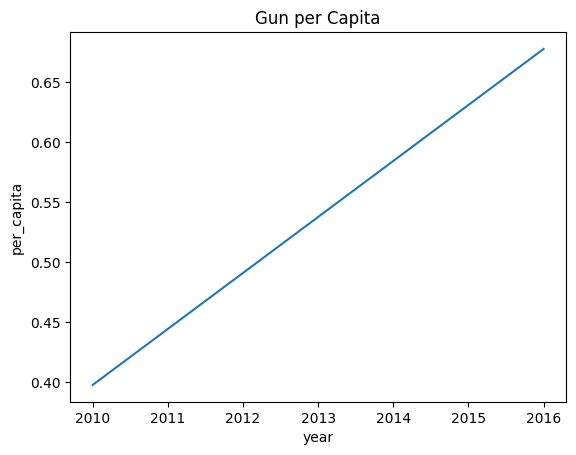

In [ ]:
#make plot gragh to show differance between 2010 and 2016
year = [2010, 2016]
#number from line code above
per_capita = [0.39781331523550745, 0.67779340497762697]
#gragh title
plt.title('Gun per Capita')
#Y axis title
plt.xlabel('year')
plt.ylabel('per_capita')
plt.plot(year, per_capita)
plt.show()


***`Q2`***
What census data is most associated with high gun per capita?

In [ ]:
print(gun['month'].dtype)

In [ ]:
#split month data type into year and month
gun[['year','month']]=gun['month'].apply(lambda x: pd.Series(x.split('-')))

In [ ]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9
2,09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,9
3,09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,9
4,09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,9


In [ ]:
#sunset date set for date regarding 2010
g10=gun[gun['year']=='2010']

In [ ]:
gun10.head()

In [ ]:
g16=gun[gun['year']=='2016']

In [ ]:
#group  the two sub-dateset by total gun per state 
guntotal16= gun16.groupby(['state'])['totals'].sum().reset_index()
guntotal10= gun10.groupby(['state'])['totals'].sum().reset_index()

In [ ]:
guntotal10.head()

,state,totals
0,Alabama,308607
1,Alaska,65909
2,Arizona,206050
3,Arkansas,191448
4,California,816399


In [ ]:
#rearrange date to be easy to track
guntotal16.rename(columns={'totals':'totals 2016'}, inplace=True)

In [ ]:
guntotal10.rename(columns={'totals':'totals 2010'}, inplace=True)

In [ ]:
#merge two sun-data-set on state columns
tot1016=guntotal16.merge(guntotal10, on='state', how='inner')

In [ ]:
tot1016.head()

,state,totals_x,totals_y
0,Alabama,616947,308607
1,Alaska,87647,65909
2,Arizona,416279,206050
3,Arkansas,266014,191448
4,California,2377167,816399


In [ ]:
#merge census with two-sub-datset
res=tot1016.merge(census, on='state',how='inner')

In [ ]:
res.columns.values

array(['state', 'totals_x', 'totals_y',
       'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'A

In [ ]:
#remove ','
res['Population estimates, July 1, 2016,  (V2016)'] = res['Population estimates, July 1, 2016,  (V2016)'].str.replace(',', '').astype(int)


In [ ]:
#make it int to we can make some calculation
res['Population estimates, July 1, 2016,  (V2016)']=res['Population estimates, July 1, 2016,  (V2016)'].astype(int)

In [ ]:
res['Population estimates base, April 1, 2010,  (V2016)'] =res['Population estimates base, April 1, 2010,  (V2016)'].str.replace(',', '').astype(int)

In [ ]:
res

,state,totals_x,totals_y,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,616947,308607,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,87647,65909,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,416279,206050,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,266014,191448,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,2377167,816399,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,23.20%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,540514,300820,5540545,5029324,10.20%,"5,029,196",6.10%,6.80%,22.80%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,317692,179595,3576452,3574114,0.10%,"3,574,097",5.20%,5.70%,21.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,59430,19240,952065,897936,6.00%,"897,934",5.80%,6.20%,21.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,1435340,559347,20612439,18804592,9.60%,"18,801,310",5.50%,5.70%,20.10%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,612985,333247,10310371,9688680,6.40%,"9,687,653",6.40%,7.10%,24.40%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [ ]:
#calculate Gun_Per_Capital for 2016
res['Gun_Per_Capital_2016'] = res['totals_x']/res['Population estimates, July 1, 2016,  (V2016)']

#calculate Gun_Per_Capital for 2010
res['Gun_Per_Capital_2010'] = res['totals_y']/res['Population estimates base, April 1, 2010,  (V2016)']

#Top 5  the highest state per capital on 2010
res.nlargest(5,'Gun_Per_Capital_2010')

,state,totals_x,totals_y,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974,4339344,2.20%,"4,339,367",6.20%,6.50%,22.80%,...,"106,011","27,258","296,155","33,208","282,704",109.9,"39,486.34","""21""",0.828683,0.549756
43,Utah,294907,553134,3051217,2763888,10.40%,"2,763,885",8.30%,9.50%,30.20%,...,"76,269","24,423","218,826","18,754","219,807",33.6,"82,169.62","""49""",0.096652,0.200129
25,Montana,136337,101095,1042520,989414,5.40%,"989,415",6.00%,6.30%,21.80%,...,"35,449","5,578","102,746","11,486","93,393",6.8,"145,545.80","""30""",0.130776,0.102177
1,Alaska,87647,65909,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,...,"22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02""",0.118140,0.092797
47,West Virginia,242350,159550,1831102,1853011,-1.20%,"1,852,994",5.50%,5.60%,20.50%,...,"39,065","5,777","104,785","12,912","94,960",77.1,"24,038.21","""54""",0.132352,0.086103


**Q** High gun by states in 2010 ,2016 and 2017

In [ ]:
g10=gun[gun['year']=='2010']

In [ ]:
g16=gun[gun['year']=='2016']

In [ ]:
g17=gun[gun['year']=='2017']

In [ ]:
concatgun = pd.concat([g10, g16, g17])

In [ ]:
concatgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
4455,12,Alabama,413.0,NaN,13978.0,24298.0,152.0,569,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43266,2010,12
4456,12,Alaska,0.0,NaN,2553.0,3950.0,93.0,146,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7036,2010,12
4457,12,Arizona,2082.0,NaN,9943.0,9814.0,219.0,431,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23942,2010,12
4458,12,Arkansas,2582.0,NaN,5816.0,12455.0,62.0,257,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23821,2010,12
4459,12,California,24901.0,NaN,24519.0,32100.0,0.0,0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81522,2010,12


In [ ]:
concatgun.columns.values


array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year', 'months'], dtype=object)

In [ ]:
concatnew = concatgun[['state', 'totals', 'year']]

In [ ]:
concatnew.head()

,state,totals,year
4455,Alabama,43266,2010
4456,Alaska,7036,2010
4457,Arizona,23942,2010
4458,Arkansas,23821,2010
4459,California,81522,2010


In [ ]:
concatnew_2010 =concatnew[concatnew['year'] == '2010']

In [ ]:
concatnew_2010.head()

,state,totals,year
4455,Alabama,43266,2010
4456,Alaska,7036,2010
4457,Arizona,23942,2010
4458,Arkansas,23821,2010
4459,California,81522,2010


In [ ]:
concatnew_2016 =concatnew[concatnew['year'] == '2016']
concatnew_2017 =concatnew[concatnew['year'] == '2017']

In [ ]:
concatyear=pd.concat([concatnew_2010,concatnew_2016,concatnew_2017])

In [ ]:
concatyear.tail()

,state,totals,year
490,Virginia,37369,2017
491,Washington,46027,2017
492,West Virginia,15772,2017
493,Wisconsin,46775,2017
494,Wyoming,3705,2017


In [ ]:
pivot_df = pd.pivot_table(concatnew, index='state', columns='year', values='totals')

# Rename the columns to add a prefix
pivot_df.columns = ['totals_2010', 'totals_2016', 'totals_2017']

In [ ]:
pivot_df.tail()

,totals_2010,totals_2016,totals_2017
state,,,
Virginia,26731.916667,44030.750000,40777.111111
Washington,27945.166667,59499.666667,46613.555556
West Virginia,13295.833333,20195.833333,16976.000000
Wisconsin,16233.083333,46818.250000,43059.666667
Wyoming,3975.750000,5299.500000,4192.888889


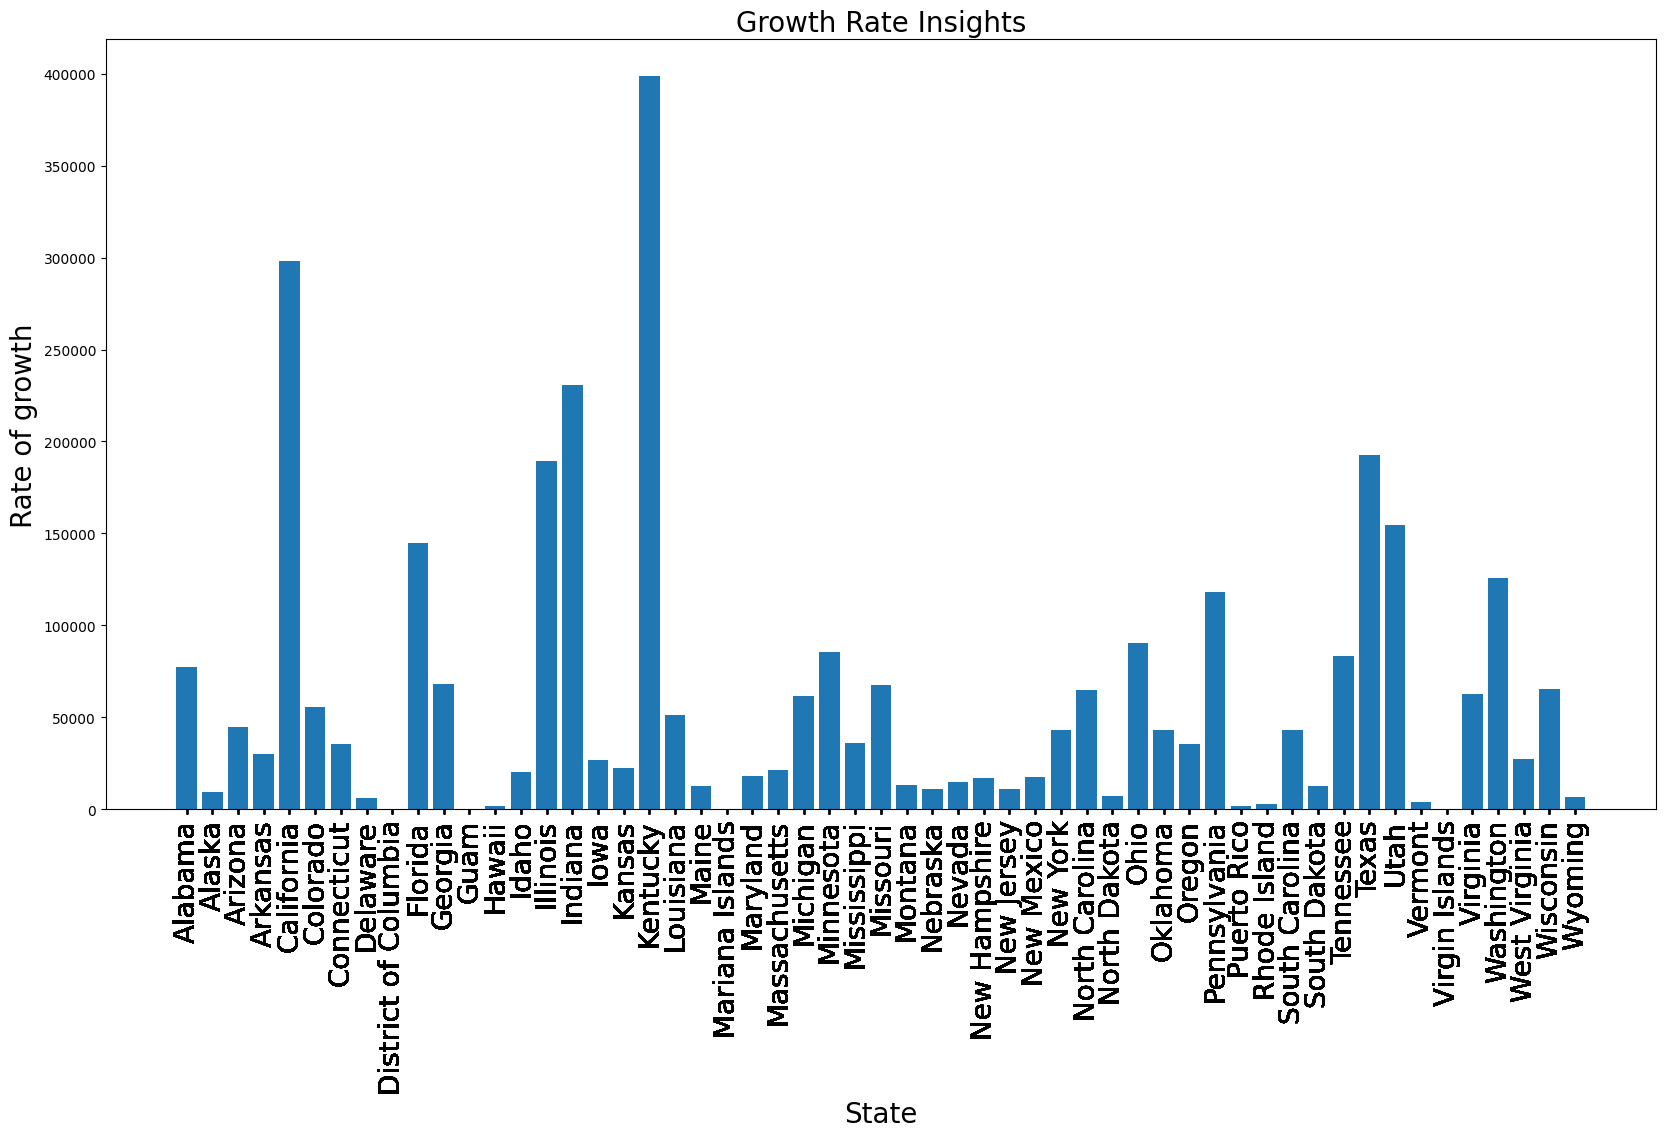

In [ ]:
#Create Bar chart for every states'gun growth
x = concatyear['state']
plt.figure(figsize = (20,10))
plt.bar(x,concatyear['totals'])
plt.title('Growth Rate Insights',fontsize = 20)
plt.xlabel('State',fontsize = 20)
plt.ylabel('Rate of growth',fontsize = 20)
#make state name clear
plt.xticks(x, rotation=90)
plt.tick_params(axis='x', labelsize= 20)

In [ ]:
concatnew[concatnew.duplicated()]


,state,totals,year
4531,Mariana Islands,0,2010
4586,Mariana Islands,0,2010
4641,Mariana Islands,0,2010
4668,Vermont,2344,2010
4683,District of Columbia,23,2010
4687,Hawaii,874,2010
4696,Mariana Islands,0,2010
4741,Guam,43,2010
4751,Mariana Islands,0,2010
4806,Mariana Islands,0,2010


In [ ]:
concatnew.drop_duplicates(inplace=True)

<ipython-input-208-27cc4bb79bde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatnew.drop_duplicates(inplace=True)


In [ ]:
concatnew_2016.head()

,state,totals,year
495,Alabama,62014,2016
496,Alaska,8786,2016
497,Arizona,44887,2016
498,Arkansas,29926,2016
499,California,298161,2016


In [ ]:
totals_by_state = concatnew.groupby('state')['totals'].sum()

In [ ]:
totals_by_state2016 = concatnew_2016.groupby('state')['totals'].sum().reset_index()
print(totals_by_state2016)

                   state   totals
0                Alabama   616947
1                 Alaska    87647
2                Arizona   416279
3               Arkansas   266014
4             California  2377167
5               Colorado   540514
6            Connecticut   317692
7               Delaware    59430
8   District of Columbia      875
9                Florida  1435340
10               Georgia   612985
11                  Guam     2123
12                Hawaii    16681
13                 Idaho   156343
14              Illinois  1924070
15               Indiana  1436725
16                  Iowa   202277
17                Kansas   196548
18              Kentucky  3676847
19             Louisiana   391869
20                 Maine   111582
21       Mariana Islands       17
22              Maryland   165367
23         Massachusetts   226212
24              Michigan   579605
25             Minnesota   651599
26           Mississippi   276161
27              Missouri   632319
28            

In [ ]:
print(totals_by_state.sort_values(ascending=False).head(10))


state
Kentucky        9480402
California      4361094
Illinois        3783315
Texas           3764768
Florida         2907452
Pennsylvania    2533275
Indiana         2389256
Ohio            1809628
Tennessee       1675437
Minnesota       1478291
Name: totals, dtype: int64


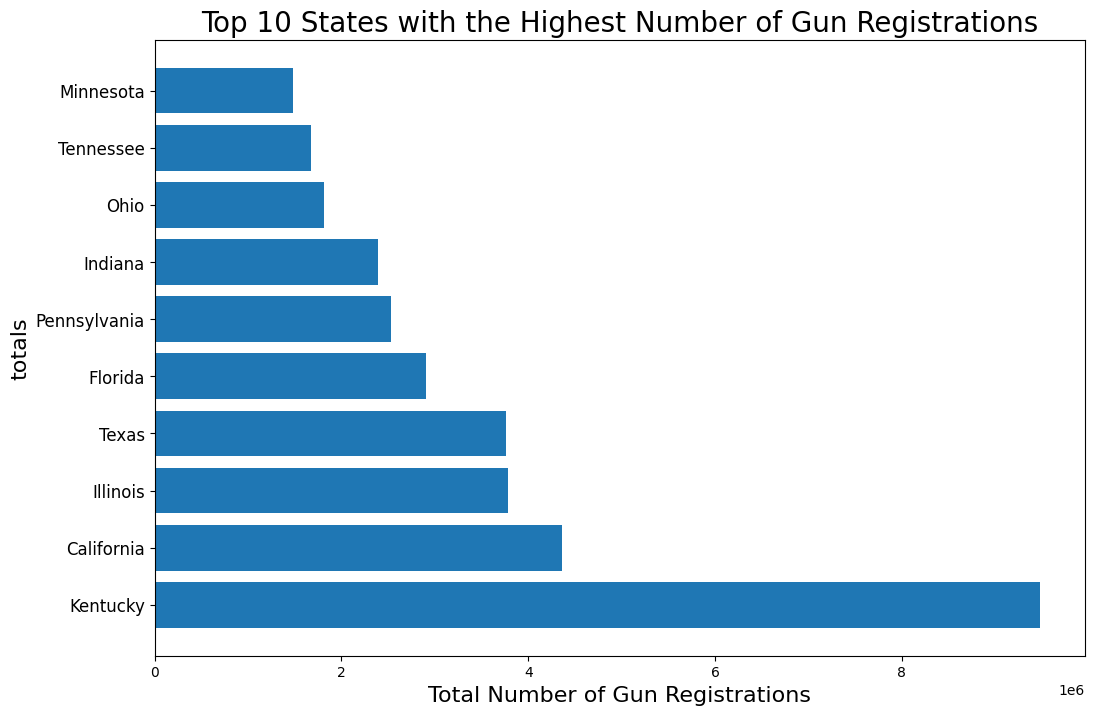

In [ ]:
# Sort the dataframe by total gun registrations
sorted_df = totals_by_state.sort_values(ascending=False)

# Create a horizontal bar chart of the top 10 states
plt.figure(figsize=(12,8))
plt.barh(sorted_df.index[:10], sorted_df.values[:10])
plt.title('Top 10 States with the Highest Number of Gun Registrations', fontsize=20)
plt.xlabel('Total Number of Gun Registrations',fontsize = 16)
plt.ylabel('totals',fontsize = 16)
plt.tick_params(axis='y', labelsize= 12)
plt.show()


### Limitations :
Non-standardisation of the datasets

### Findings :

> 1. Kentucky has the largest count of total gun 


> 2. There are few weak associations between the census criteria and gun per state: 


> 3. Count of gun registrations have gone up 



## Result :
There is postive trend in gun purchase over the year